## How are in-demand skills trending for Data Scientists?

### Methology
* Aggregate skill counts monthly
* Re-analyze based on percentage of total jobs
* Plot the monthly skill demand

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')]
df_DS_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
17,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,None,NaN,NaN,Johns Hopkins Applied Physics Laboratory,"[go, apl, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
32,Data Scientist,Sr. Data Scientist (NLP) - Full-time / Part-time,"Dallas, TX",via Snagajob,Full-time,False,"Texas, United States",2023-03-13 13:07:03,False,True,United States,None,NaN,NaN,MCKESSON,"[python, azure, databricks, pyspark, pandas, h...","{'cloud': ['azure', 'databricks'], 'libraries'..."
40,Data Scientist,"Data Scientist, Data Strategy and Analytics","Alameda, CA",via Trabajo.org,Full-time,False,"California, United States",2023-04-26 13:05:10,False,False,United States,None,NaN,NaN,Abbott,None,None
41,Data Scientist,Data Scientist I,"Paris, KY",via Jobs By Care,Full-time,False,Georgia,2023-11-13 14:59:39,False,False,United States,None,NaN,NaN,Appalachian Regional Healthcare,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785578,Data Scientist,"Data Scientist, Advanced Motor Technology","Newark, CA",via Trabajo.org,Full-time,False,"California, United States",2023-05-30 06:02:25,False,True,United States,None,NaN,NaN,Lucid Motors,"[go, python, sql, matlab, numpy, pandas, sciki...","{'libraries': ['numpy', 'pandas', 'scikit-lear..."
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."
785651,Data Scientist,Data Scientist (Supply Chain Security),"Fort Belvoir, VA",via LinkedIn,Full-time,False,Georgia,2023-01-07 07:10:51,False,False,United States,None,NaN,NaN,Defense Logistics Agency,[go],{'programming': ['go']}
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None


In [4]:
df_DS_US['job_posted_month_no'] = df_DS_US['job_posted_date'].dt.month
df_DS_US

C:\Users\broha\AppData\Local\Temp\ipykernel_11168\3875466658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DS_US['job_posted_month_no'] = df_DS_US['job_posted_date'].dt.month


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",4
17,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,None,NaN,NaN,Johns Hopkins Applied Physics Laboratory,"[go, apl, excel]","{'analyst_tools': ['excel'], 'programming': ['...",6
32,Data Scientist,Sr. Data Scientist (NLP) - Full-time / Part-time,"Dallas, TX",via Snagajob,Full-time,False,"Texas, United States",2023-03-13 13:07:03,False,True,United States,None,NaN,NaN,MCKESSON,"[python, azure, databricks, pyspark, pandas, h...","{'cloud': ['azure', 'databricks'], 'libraries'...",3
40,Data Scientist,"Data Scientist, Data Strategy and Analytics","Alameda, CA",via Trabajo.org,Full-time,False,"California, United States",2023-04-26 13:05:10,False,False,United States,None,NaN,NaN,Abbott,None,None,4
41,Data Scientist,Data Scientist I,"Paris, KY",via Jobs By Care,Full-time,False,Georgia,2023-11-13 14:59:39,False,False,United States,None,NaN,NaN,Appalachian Regional Healthcare,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['...",11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785578,Data Scientist,"Data Scientist, Advanced Motor Technology","Newark, CA",via Trabajo.org,Full-time,False,"California, United States",2023-05-30 06:02:25,False,True,United States,None,NaN,NaN,Lucid Motors,"[go, python, sql, matlab, numpy, pandas, sciki...","{'libraries': ['numpy', 'pandas', 'scikit-lear...",5
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':...",4
785651,Data Scientist,Data Scientist (Supply Chain Security),"Fort Belvoir, VA",via LinkedIn,Full-time,False,Georgia,2023-01-07 07:10:51,False,False,United States,None,NaN,NaN,Defense Logistics Agency,[go],{'programming': ['go']},1
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None,10


In [5]:
df_DS_US_explode = df_DS_US.explode('job_skills')

In [19]:
df_DS_US_pivot = df_DS_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_DS_US_pivot.loc['Total'] = df_DS_US_pivot.sum()
df_DS_US_pivot = df_DS_US_pivot[df_DS_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_DS_US_pivot = df_DS_US_pivot.drop('Total')
df_DS_US_pivot

job_skills,python,sql,r,sas,tableau,aws,spark,java,tensorflow,azure,...,asp.net core,clickup,couchdb,fedora,ocaml,mattermost,nuix,shogun,symfony,wrike
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,5243,3770,3362,1700,1630,1364,1356,916,896,817,...,1,1,1,0,0,0,1,0,1,0
2,3718,2670,2334,1144,1268,854,895,645,565,573,...,0,0,0,0,0,0,0,0,0,0
3,3394,2426,2189,1144,1126,848,787,575,529,538,...,0,0,0,0,0,0,0,1,0,0
4,3622,2463,2181,1204,1213,882,823,622,582,538,...,0,0,0,0,0,0,0,0,0,0
5,3232,2293,2016,1150,1174,797,774,629,517,521,...,0,0,0,0,0,0,0,0,0,0
6,3431,2442,2107,1158,1135,818,822,586,537,568,...,0,0,0,0,0,0,0,0,0,1
7,3541,2479,2210,1106,1223,860,802,581,570,607,...,0,0,0,1,0,0,0,0,0,0
8,4566,3324,2896,1598,1520,1076,1075,767,809,727,...,0,0,0,0,0,0,0,0,0,0
9,3112,2155,1791,1158,921,697,740,534,567,558,...,0,0,0,0,0,0,0,0,0,0


In [22]:
DS_totals = df_DS_US.groupby('job_posted_month_no').size()

In [25]:
df_DS_US_percent = df_DS_US_pivot.div(DS_totals/100, axis=0)

In [26]:
# month no to month name
df_DS_US_percent = df_DS_US_percent.reset_index()
df_DS_US_percent['job_posted_month'] = df_DS_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DS_US_percent = df_DS_US_percent.set_index('job_posted_month')
df_DS_US_percent = df_DS_US_percent.drop(columns='job_posted_month_no')

In [27]:
df_DS_US_percent

job_skills,python,sql,r,sas,tableau,aws,spark,java,tensorflow,azure,...,asp.net core,clickup,couchdb,fedora,ocaml,mattermost,nuix,shogun,symfony,wrike
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,75.820680,54.519161,48.618944,24.584237,23.571945,19.725235,19.609544,13.246565,12.957339,11.814895,...,0.014461,0.014461,0.014461,0.000000,0.000000,0.000000,0.014461,0.000000,0.014461,0.000000
Feb,75.020178,53.874092,47.094431,23.083132,25.585149,17.231638,18.058918,13.014528,11.400323,11.561743,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,71.019042,50.763758,45.804562,23.938062,23.561415,17.744298,16.467880,12.031806,11.069261,11.257585,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020925,0.000000,0.000000
Apr,74.419560,50.606123,44.811999,24.738032,24.922950,18.122046,16.909801,12.779947,11.958085,11.054037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,73.840530,52.387480,46.058944,26.273703,26.822024,18.208819,17.683345,14.370573,11.811743,11.903130,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,73.864370,52.572659,45.360603,24.930032,24.434876,17.610334,17.696448,12.615716,11.560818,12.228202,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021529
Jul,72.621001,50.840853,45.324036,22.682527,25.082034,17.637408,16.447908,11.915505,11.689910,12.448728,...,0.000000,0.000000,0.000000,0.020509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,72.269706,52.611586,45.837290,25.292814,24.058246,17.030706,17.014878,12.139918,12.804685,11.506806,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,68.126095,47.176007,39.207531,25.350263,20.161996,15.258319,16.199650,11.690018,12.412434,12.215412,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


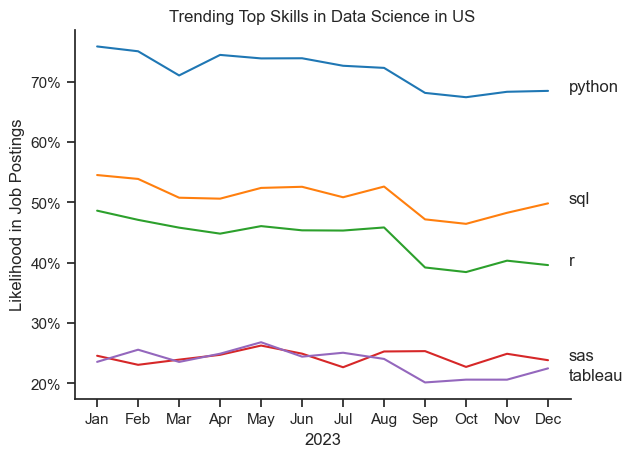

In [47]:
df_plot = df_DS_US_percent.iloc[:, :5]
sns.lineplot(data = df_plot, dashes=False, palette='tab10')
sns.set_theme(style = 'ticks')
sns.despine()

plt.title('Trending Top Skills in Data Science in US')
plt.xlabel('2023')
plt.ylabel('Likelihood in Job Postings')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
        if i == 4:
            plt.text(11.5, df_plot.iloc[-1, i], df_plot.columns[i], va = 'top')
        else:
            plt.text(11.5, df_plot.iloc[-1, i], df_plot.columns[i])
        
plt.show()